In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


# Sales Trends

## 1. What is my total daily, weekly, and monthly sales?

## 2. Which days of the week and hours of the day bring in the most revenue?

## 3. How does sales performance vary across different months or seasons?

In [3]:
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 304.9+ KB


C:\Users\andi\AppData\Local\Temp\ipykernel_16304\4253387676.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


### Shortcut functions for ploting

In [18]:
# plot_sales function
def line_plot (x_data, y_data, marker, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x_data, y_data, marker=marker)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# bar_sales function
def bar_plot (x_data, y_data, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x_data, y_data)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [5]:
def line_sns (x_data, y_data, data, hue, marker, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x_data, y=y_data, data=data, hue=hue, marker=marker)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


def bar_sns (x_data, y_data, data, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_data, y=y_data, data=data, hue=hue)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

### Daily Sales Trend

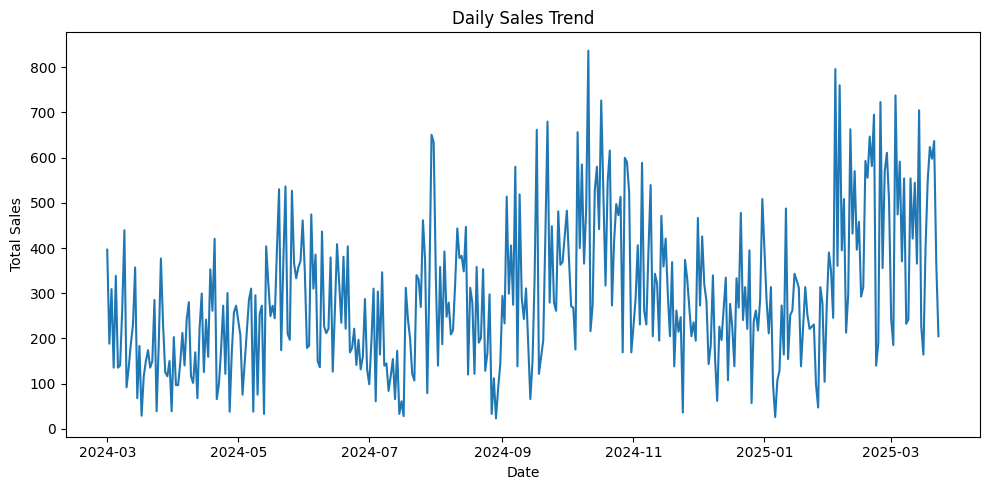

In [6]:
# Daily sales
daily_sales = df.groupby('Date')['money'].sum()

# Visualize the daily sales
line_plot(daily_sales.index, 
           daily_sales.values, 
           None, 
           'Daily Sales Trend', 
           'Date', 
           'Total Sales')

### Weekly Sales Trend

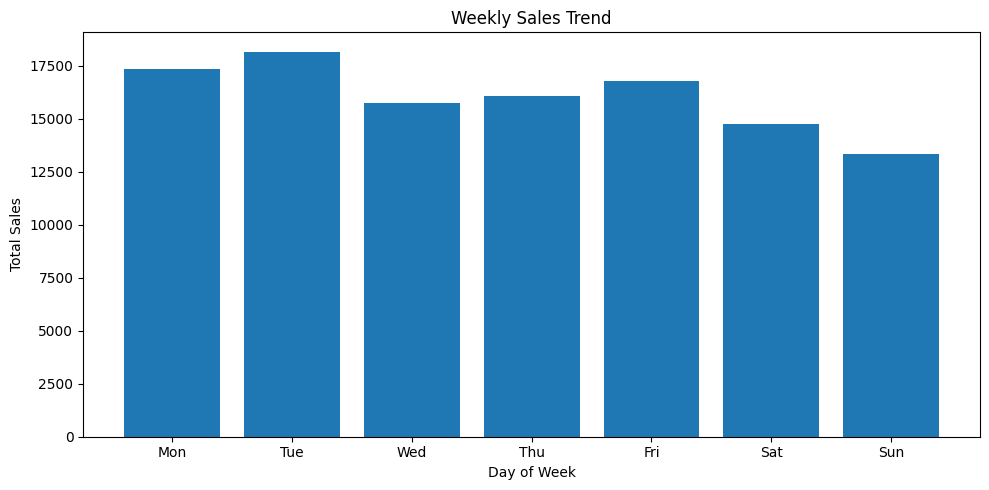

In [7]:
# weekly sales
weekday_sales = df.groupby('Weekday')['money'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Vizualize weekly sales
bar_plot(weekday_sales.index, 
          weekday_sales.values, 
          'Weekly Sales Trend', 
          'Day of Week', 
          'Total Sales')

### Monthly Sales Trend

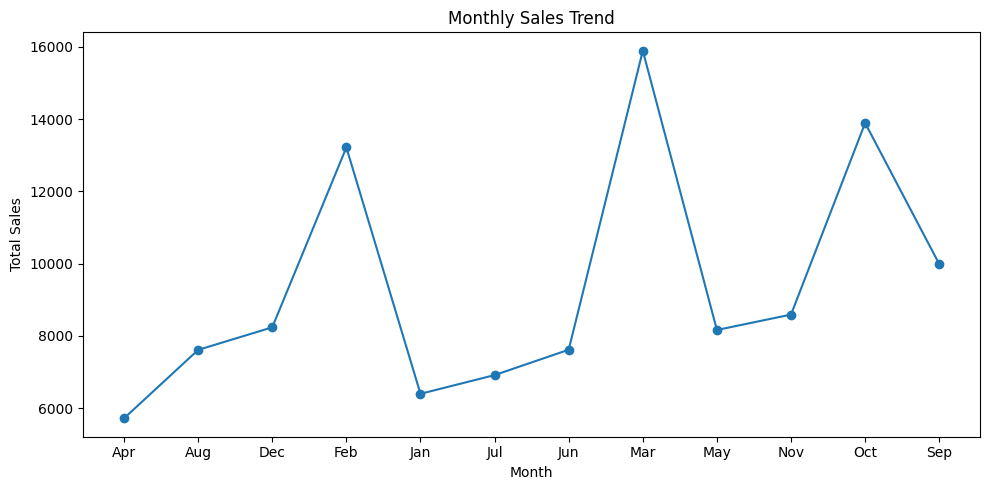

In [8]:
# Monthly Sales
monthly_sales = df.groupby('Month_name')['money'].sum()

# Visualize monthly sales
line_plot(monthly_sales.index, 
           monthly_sales.values, 
           'o', 
           'Monthly Sales Trend', 
           'Month', 
           'Total Sales')

### Hourly Sales Trend

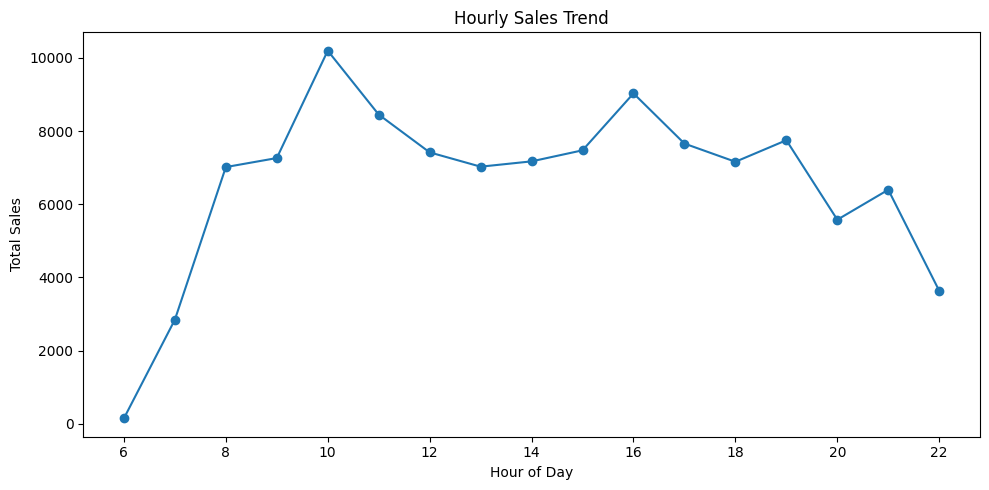

In [9]:
# Hourly Sales
hourly_sales = df.groupby('hour_of_day')['money'].sum()

# Visualize the hourly data
line_plot(hourly_sales.index,
           hourly_sales.values,
           'o',
           'Hourly Sales Trend',
           'Hour of Day',
           'Total Sales')

# Product Performance

## 1.Which coffee types or drinks sell the most (and least)?

## 2.What’s the average sale price per product?

## 3.Are there products that sell better at specific times of day (e.g., Latte in the morning, Hot Chocolate at night)?

In [10]:
# Product Performance
product_perf = (df.groupby('coffee_name')['money']
                 .agg(unit_sold='count', 
                      total_revenue='sum', 
                      avg_price='mean')
                 .sort_values(by='total_revenue', ascending=False)
                 .round(2))
print(product_perf.head())

                     unit_sold  total_revenue  avg_price
coffee_name                                             
Latte                      757       26875.30      35.50
Americano with Milk        809       24751.12      30.59
Cappuccino                 486       17439.14      35.88
Americano                  564       14650.26      25.98
Hot Chocolate              276        9933.46      35.99


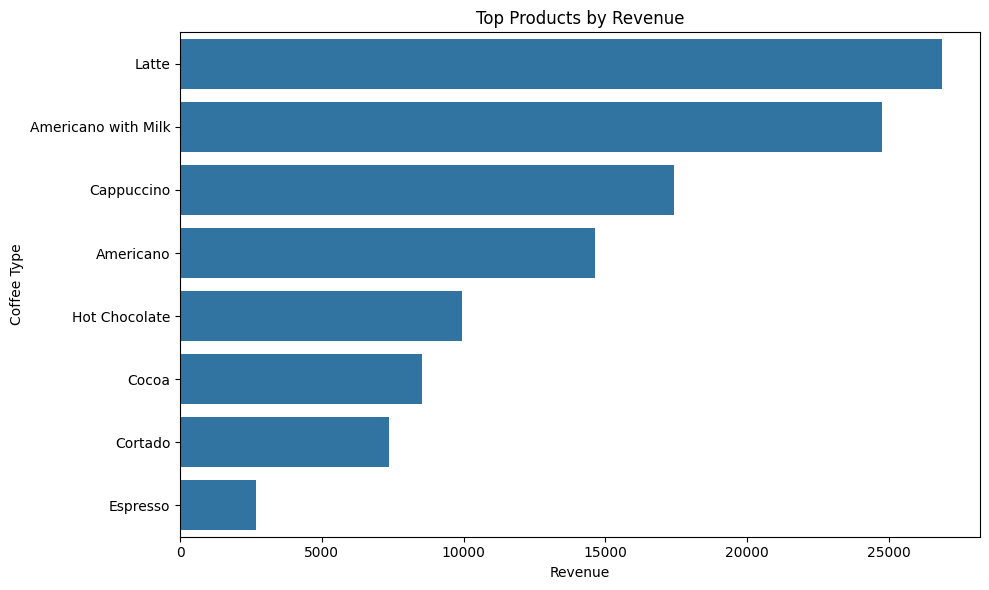

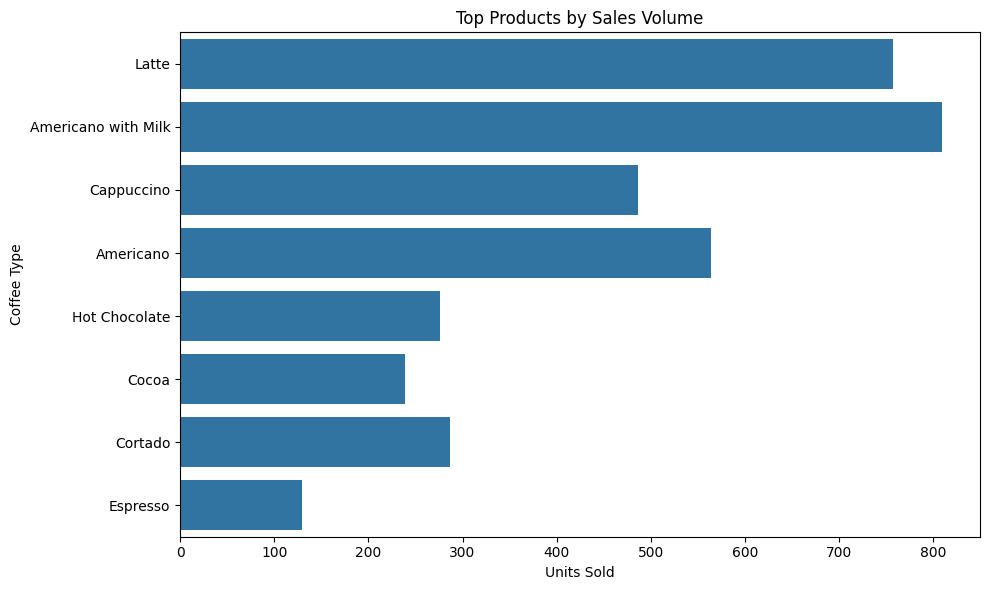

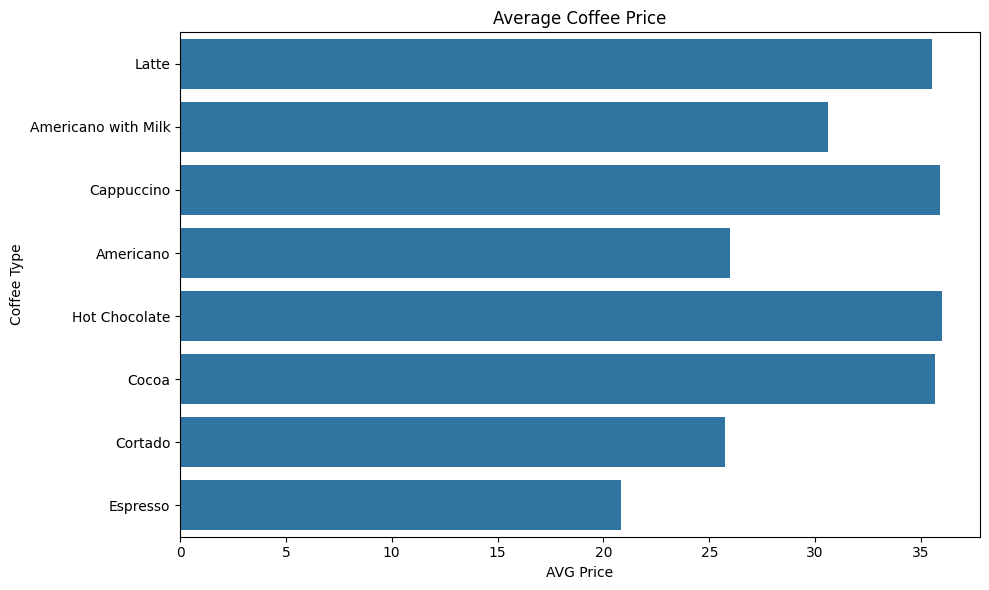

In [11]:
# Visualize the product performance

# Top Products by Revenue
bar_sns(product_perf['total_revenue'], 
         product_perf.index,
        None,
        None,
         'Top Products by Revenue',
         'Revenue',
         'Coffee Type')
# Top Products by Sales Volume
bar_sns(product_perf['unit_sold'], 
         product_perf.index,
        None,
        None,
         'Top Products by Sales Volume',
         'Units Sold',
         'Coffee Type')
# Average Price per Coffee
bar_sns(product_perf['avg_price'], 
         product_perf.index,
        None,
        None,
         'Average Coffee Price',
         'AVG Price',
         'Coffee Type')

### Product Performance Over Time

In [12]:
# Time of day Performance
tod_perf = (df.groupby(['Time_of_Day', 'coffee_name'])['money']
            .sum()
            .reset_index())
tod_perf.head()

,Time_of_Day,coffee_name,money
0,Afternoon,Americano,6133.94
1,Afternoon,Americano with Milk,7384.36
2,Afternoon,Cappuccino,5910.70
3,Afternoon,Cocoa,2685.92
4,Afternoon,Cortado,2315.84


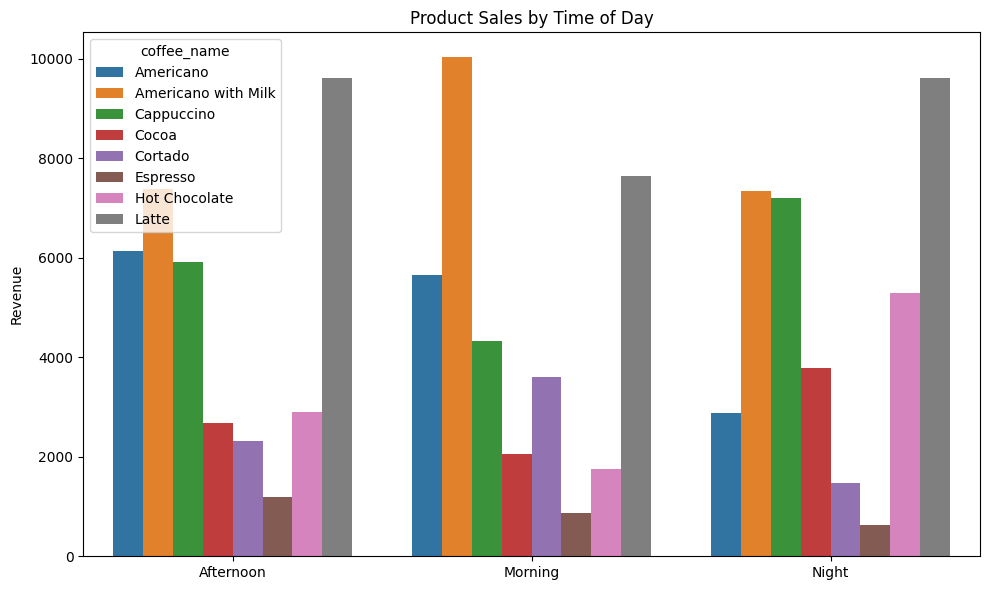

In [13]:
# Visualize the TOD Performance
bar_sns ('Time_of_Day', 
         'money', 
         tod_perf, 
         'coffee_name', 
         'Product Sales by Time of Day', 
         None, 
         'Revenue')

In [14]:
# Monthly Performance
import calendar
month_order = list(calendar.month_abbr)[1:]
df['Month_name'] = pd.Categorical(df['Month_name'], categories=month_order, ordered=True)
monthly_perf = df.groupby(['Month_name', 'coffee_name'])['money'].sum().reset_index().sort_values(by='Month_name', ascending=True)
monthly_perf.head()

,Month_name,coffee_name,money
0,Jan,Americano,649.00
1,Jan,Americano with Milk,1604.72
2,Jan,Cappuccino,965.52
3,Jan,Cocoa,500.64
4,Jan,Cortado,571.12


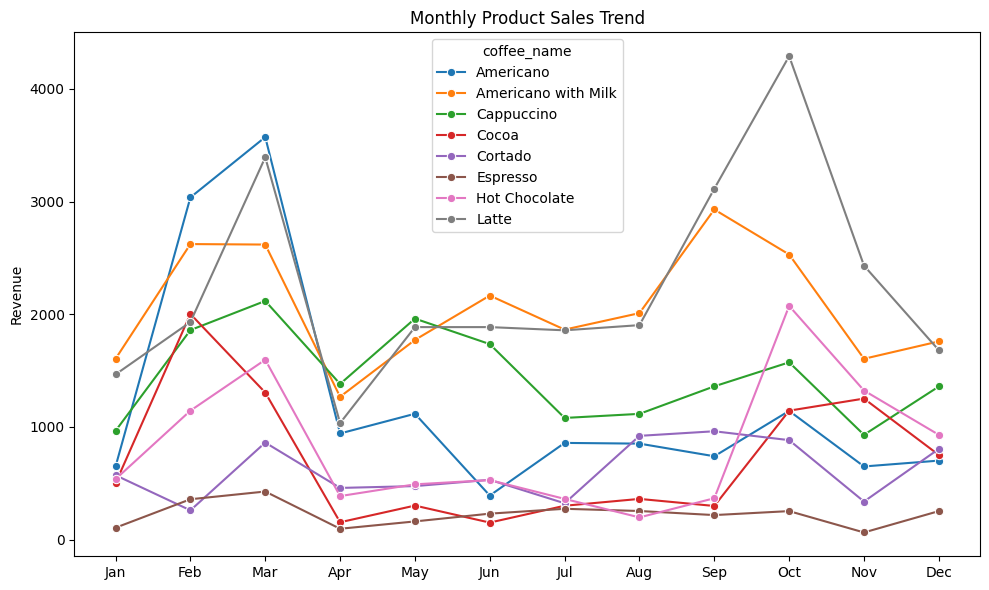

In [15]:
# Visualize Monthly Product Performance
line_sns (x_data='Month_name', 
          y_data='money', 
          data=monthly_perf, 
          hue='coffee_name', 
          marker='o', 
          title='Monthly Product Sales Trend', 
          xlabel=None, 
          ylabel='Revenue')